<a href="https://colab.research.google.com/github/HaSeoHyun/DataScience_Python_Practice/blob/main/2023_%EC%B9%98%EC%95%88_%EC%95%88%EC%A0%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%B5%EB%AA%A8%EC%A0%84_%EC%A0%9C%EC%B6%9C%EC%9E%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<2023 치안 데이터 공모전>
티켓 팀(대표: 하서현) 코드 

# 1. NPA2020.csv와 KP2020.csv 분석


-데이터 표현에 한글 적용을 위한 환경 구축 및 모듈, 패키지 설치 


## 개발 환경 구축
-csv 데이터 불러오기, 모듈 및 패키지 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#NPA2020.csv upload
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/2023DataAnaylze/NPA2020.csv',encoding = 'cp949',low_memory = False)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
KP_df = pd.read_csv('/content/drive/MyDrive/KP2020.csv',encoding = 'cp949',low_memory = False)
KP_df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [3]:
#colab에 한글 설치
plt.rc('font', family='NanumBarunGothic') 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

## 3. Data Cleaning

In [4]:
df['RECV_CPLT_TM'] = df['RECV_CPLT_TM'].astype('str').str.zfill(6)   #NPA2020.csv 접수시간(RECV_CPLT_TM) 수정
#df['RECV_CPLT_TM'] = pd.to_numeric(df['RECV_CPLT_TM'])  #str -> int 변환
df.head()

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,000007,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,000132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,000039,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,000110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,000342,13,10,601,1,NaN,127.404663,36.341685,NaN


사건종결코드(EVT_CL_CD) 400번대: 교통 관련 코드

-> 따라서 400번대에 해당하는 데이터만 추출

In [5]:
ns_df= df[(df['EVT_CL_CD'] > 400) & (df['EVT_CL_CD'] < 500)]
ns_df.to_csv('교통사고데이터.csv',index = False)  #추출된 데이터를 교통사고데이터.csv로 따로 저장합니다 

In [6]:
ns_df = pd.read_csv('교통사고데이터.csv', low_memory = False)
ns_df['RECV_CPLT_TM'] = ns_df['RECV_CPLT_TM'].astype('str').str.zfill(6)   #NPA2020.csv 접수시간(RECV_CPLT_TM) 수정

ns_df

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,003240,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN
1,20200101,003532,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN
2,20200101,002135,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN
3,20200101,004301,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN
4,20200101,184335,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N
...,...,...,...,...,...,...,...,...,...,...
142923,20201122,002007,13,7,406,1,대전광역시 중구 오류동(행정:오류동) 175-2,127.404540,36.325219,
142924,20201122,004008,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,Y
142925,20201122,005719,19,5,406,3,충청남도 천안시 서북구 불당동(행정:불당동) 1540,127.107617,36.813773,
142926,20201122,003753,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,Y


In [7]:
KP_ns_df= KP_df[(KP_df['EVT_CL_CD'] > 400) & (KP_df['EVT_CL_CD'] < 500)]
KP_ns_df.to_csv('KP2020교통사고데이터.csv',index = False)  #추출된 데이터를 따로 저장
KP_ns_df = pd.read_csv('KP2020교통사고데이터.csv', low_memory = False)

KP_ns_df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
1,대전청,20/12/01 03:24:26.000000000,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
2,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
3,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
4,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN
...,...,...,...,...,...,...,...,...,...,...
9338,충남청,20/12/31 00:16:14.000000000,19,10,406,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 690-8,126.298968,36.747649,Y
9339,대전청,20/12/31 01:08:43.000000000,13,10,401,1.0,대전광역시 중구 대흥동(행정:대흥동),127.428343,36.324386,NaN
9340,충남청,20/12/31 00:26:16.000000000,19,10,406,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 690-8,126.298968,36.747649,Y
9341,대전청,20/12/31 01:17:01.000000000,13,10,401,1.0,대전광역시 서구 도마동(행정:도마2동) 549-1,127.369099,36.312971,NaN


In [8]:
KP_ns_df[KP_ns_df['RECV_CPLT_DM'].str.extract(r'20/12/(.*)')[0].notnull()]  #전부 2020년 12월 데이터인지 파악 
len(KP_ns_df)  #9343일시 전부 2020년 12월 데이터 

9343

## 4. 데이터 시각화 

### 사건 코드별로 그래프 분류 

In [9]:
#plt.bar(ns_df['EVT_CL_CD'])
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(ns_df.loc[ns_df['EVT_CL_CD'] == i]))

코드 401번의 개수: 93659
코드 402번의 개수: 21359
코드 403번의 개수: 11088
코드 404번의 개수: 7
코드 405번의 개수: 16
코드 406번의 개수: 16799


In [10]:
for i in range(401,407):
  print("12월 코드 %d번의 개수:"%i,len(KP_ns_df.loc[KP_ns_df['EVT_CL_CD'] == i]))

12월 코드 401번의 개수: 6207
12월 코드 402번의 개수: 1294
12월 코드 403번의 개수: 516
12월 코드 404번의 개수: 0
12월 코드 405번의 개수: 1
12월 코드 406번의 개수: 1325


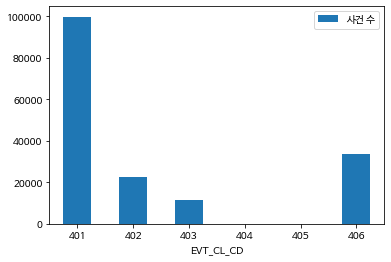

In [11]:
code_df = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                        '사건 수':[99866,22653,11088+516,7+0,17,16799+16799],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
'''코드별 발생빈도가 매우 다양하기 때문에, 일반적인 막대그래프로 표현하면 404, 405와 같은 코드는 육안으로 파악할 수 없다.'''
#참고용 일반적 막대그래프
code_df.plot.bar(x='EVT_CL_CD', y='사건 수', rot=0)

In [12]:
'''따라서 y축의 값을 변경해준다'''
'''y축의 값이 밑이 log인 수로 변경'''
import plotly.express as px
fig = px.bar(code_df[['EVT_CL_CD','사건 수']].sort_values('EVT_CL_CD', ascending = False),
             x = 'EVT_CL_CD', y = '사건 수', log_y = True, template = 'ggplot2',height = 500, width = 500)
fig.show()

###월별 사건 발생 수 그래프 

In [13]:
#우선 RECV_CPLT_DT열을 모두 월만 남기고 없애기
mt_df = ns_df.loc[:,'RECV_CPLT_DT':'EVT_CL_CD']
#mt_df.replace({'RECV_CPLT_DT': {r'\d{4}(\d{2})\d{2}': r'\1'}},regex = True)
mt_df['RECV_CPLT_DT'] = mt_df['RECV_CPLT_DT'].astype(str)
mt_df['RECV_CPLT_DT'] = mt_df['RECV_CPLT_DT'].str.replace(r'(\d{4})(\d{2})\d{2}', r'\2')
mt_df['RECV_CPLT_DT'] = mt_df['RECV_CPLT_DT'].astype(int)
mt_df

<ipython-input-13-08039690948b>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
0,1,003240,13,10,402
1,1,003532,13,10,406
2,1,002135,13,10,401
3,1,004301,13,10,401
4,1,184335,13,10,401
...,...,...,...,...,...
142923,11,002007,13,7,406
142924,11,004008,13,5,401
142925,11,005719,19,5,406
142926,11,003753,13,5,401


In [14]:
for i in range(1,12):
  print("%d월의 사건 수:"%i,len(ns_df.loc[mt_df['RECV_CPLT_DT'] == i]))

KP_ns_df[KP_ns_df['RECV_CPLT_DM'].str.extract(r'20/12/(.*)')[0].notnull()]  #전부 2020년 12월 데이터인지 파악 
print("12월의 사건 수:",len(KP_ns_df))

1월의 사건 수: 12409
2월의 사건 수: 11088
3월의 사건 수: 10682
4월의 사건 수: 11814
5월의 사건 수: 13879
6월의 사건 수: 14066
7월의 사건 수: 14595
8월의 사건 수: 14808
9월의 사건 수: 14995
10월의 사건 수: 14423
11월의 사건 수: 10169
12월의 사건 수: 9343


그래프로 표현 

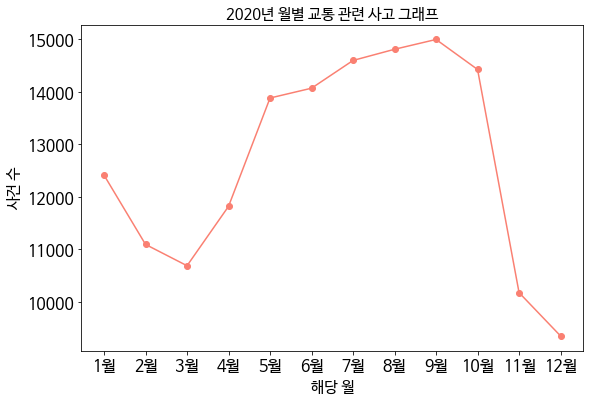

In [15]:
x_values = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [12409,11088,10682,11814,13879,14066,14595,14808,14995,14423,10169,9343]

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('2020년 월별 교통 관련 사고 그래프',fontsize = 15)
plt.xlabel('해당 월',size = 15)
plt.ylabel('사건 수', size = 15)
plt.xticks()

plt.show()

####월별 코드 수를 그래프로 표현 

In [16]:
mt_cd = mt_df.loc[:,['RECV_CPLT_DT','EVT_CL_CD']] #월과 코드만 가져온다 
#mt_cd

#####1월 코드 수 그래프 

코드 401번의 개수: 8595
코드 402번의 개수: 1702
코드 403번의 개수: 1203
코드 404번의 개수: 1
코드 405번의 개수: 2
코드 406번의 개수: 906


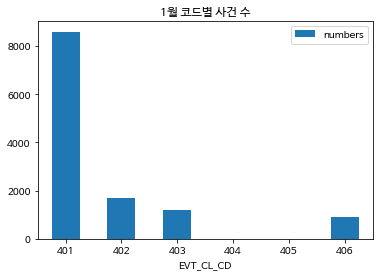

In [17]:
#mt1_df: 1월에 발생한 교통사고만 추출
mt1_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 1]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt1_df.loc[mt1_df['EVT_CL_CD'] == i]))
code_df1 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[8595,1702,1203,1,2,906],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#일반적 막대그래프
code_df1.plot.bar(x='EVT_CL_CD', y='numbers',  title="1월 코드별 사건 수", rot=0)

#####2월 코드 수 그래프 

코드 401번의 개수: 7474
코드 402번의 개수: 1699
코드 403번의 개수: 924
코드 404번의 개수: 0
코드 405번의 개수: 0
코드 406번의 개수: 991


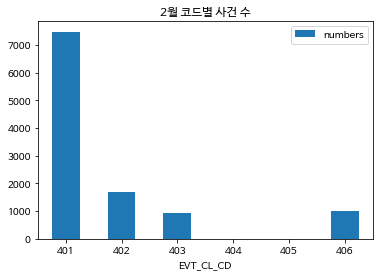

In [18]:
mt2_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 2]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt2_df.loc[mt2_df['EVT_CL_CD'] == i]))
code_df2 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[7474,1699,924,0,0,991],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df2.plot.bar(x='EVT_CL_CD', y='numbers',  title="2월 코드별 사건 수", rot=0)

#####3월 코드 수 그래프 

코드 401번의 개수: 7051
코드 402번의 개수: 1481
코드 403번의 개수: 898
코드 404번의 개수: 0
코드 405번의 개수: 1
코드 406번의 개수: 1251


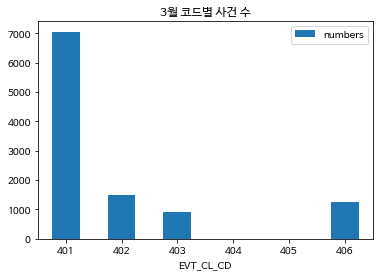

In [19]:
mt3_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 3]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt3_df.loc[mt3_df['EVT_CL_CD'] == i]))
code_df3 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[7051,1481,898,0,1,1251],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df3.plot.bar(x='EVT_CL_CD', y='numbers',  title="3월 코드별 사건 수", rot=0)

#####4월 코드 수 그래프 

코드 401번의 개수: 7608
코드 402번의 개수: 1846
코드 403번의 개수: 1011
코드 404번의 개수: 0
코드 405번의 개수: 0
코드 406번의 개수: 1349


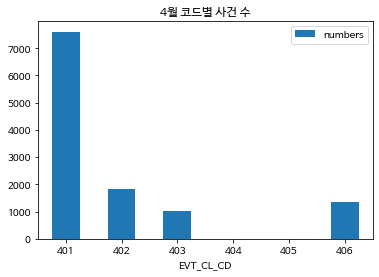

In [20]:
mt4_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 4]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt4_df.loc[mt4_df['EVT_CL_CD'] == i]))
code_df4 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[7608,1846,1011,0,0,1349],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df4.plot.bar(x='EVT_CL_CD', y='numbers',  title="4월 코드별 사건 수", rot=0)

#####5월 코드 수 그래프 

코드 401번의 개수: 8943
코드 402번의 개수: 2032
코드 403번의 개수: 1173
코드 404번의 개수: 1
코드 405번의 개수: 3
코드 406번의 개수: 1727


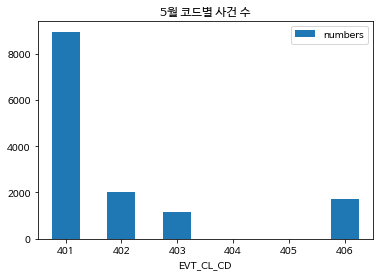

In [21]:
mt5_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 5]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt5_df.loc[mt5_df['EVT_CL_CD'] == i]))
code_df5 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[8943,2032,1173,1,3,1727],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df5.plot.bar(x='EVT_CL_CD', y='numbers',  title="5월 코드별 사건 수", rot=0)

#####6월 코드 수 그래프 

코드 401번의 개수: 9191
코드 402번의 개수: 2134
코드 403번의 개수: 1128
코드 404번의 개수: 1
코드 405번의 개수: 1
코드 406번의 개수: 1611


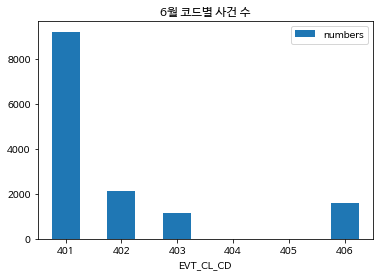

In [22]:
mt6_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 6]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt6_df.loc[mt6_df['EVT_CL_CD'] == i]))
code_df6 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[9191,2134,1128,1,1,1611],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df6.plot.bar(x='EVT_CL_CD', y='numbers',  title="6월 코드별 사건 수", rot=0)

#####7월 코드 수 그래프 

코드 401번의 개수: 9328
코드 402번의 개수: 2403
코드 403번의 개수: 1050
코드 404번의 개수: 2
코드 405번의 개수: 2
코드 406번의 개수: 1810


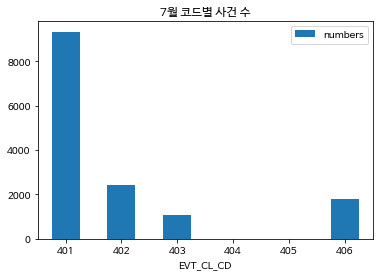

In [23]:
mt7_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 7]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt7_df.loc[mt7_df['EVT_CL_CD'] == i]))
code_df7 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[9328,2403,1050,2,2,1810],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df7.plot.bar(x='EVT_CL_CD', y='numbers',  title="7월 코드별 사건 수", rot=0)

#####8월 코드 수 그래프 

코드 401번의 개수: 9571
코드 402번의 개수: 2303
코드 403번의 개수: 990
코드 404번의 개수: 1
코드 405번의 개수: 2
코드 406번의 개수: 1941


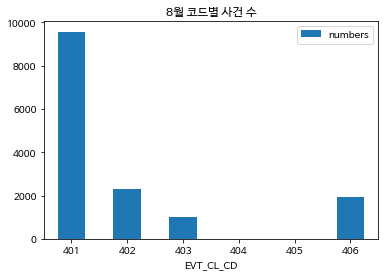

In [24]:
mt8_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 8]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt8_df.loc[mt8_df['EVT_CL_CD'] == i]))
code_df8 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[9571,2303,990,1,2,1941],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df8.plot.bar(x='EVT_CL_CD', y='numbers',  title="8월 코드별 사건 수", rot=0)

#####9월 코드 수 그래프 

코드 401번의 개수: 9665
코드 402번의 개수: 2222
코드 403번의 개수: 1132
코드 404번의 개수: 0
코드 405번의 개수: 0
코드 406번의 개수: 1976


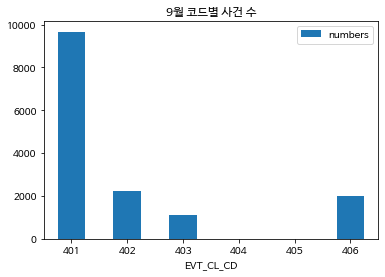

In [25]:
mt9_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 9]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt9_df.loc[mt9_df['EVT_CL_CD'] == i]))
code_df9 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[9665,2222,1132,0,0,1976],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df9.plot.bar(x='EVT_CL_CD', y='numbers',  title="9월 코드별 사건 수", rot=0)

#####10월 코드 수 그래프 

코드 401번의 개수: 9490
코드 402번의 개수: 2047
코드 403번의 개수: 992
코드 404번의 개수: 0
코드 405번의 개수: 2
코드 406번의 개수: 1892


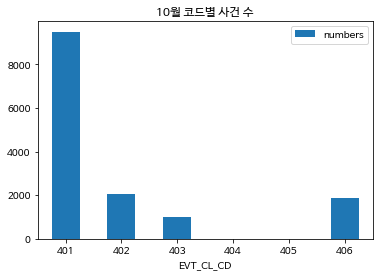

In [26]:
mt10_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 10]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt10_df.loc[mt10_df['EVT_CL_CD'] == i]))
code_df10 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[9490,2047,992,0,2,1892],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df10.plot.bar(x='EVT_CL_CD', y='numbers',  title="10월 코드별 사건 수", rot=0)

#####11월 코드 수 그래프 

코드 401번의 개수: 6743
코드 402번의 개수: 1490
코드 403번의 개수: 587
코드 404번의 개수: 1
코드 405번의 개수: 3
코드 406번의 개수: 1345


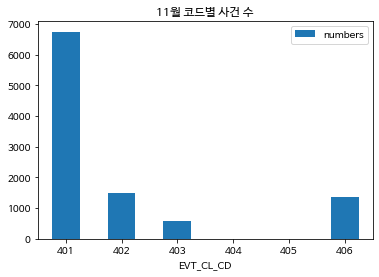

In [27]:
mt11_df = mt_cd[mt_cd['RECV_CPLT_DT'] == 11]
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(mt11_df.loc[mt11_df['EVT_CL_CD'] == i]))
code_df11 = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                      'numbers':[6743,1490,587,1,3,1345],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
#막대그래프
code_df11.plot.bar(x='EVT_CL_CD', y='numbers',  title="11월 코드별 사건 수", rot=0)

#####12월 코드 수 그래프 

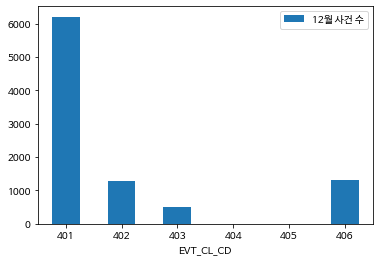

In [28]:
code_df = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                        '12월 사건 수':[6207,1294,516,0,1,1325],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
'''코드 401의 빈도가 매우 높기 때문에, 404와 같이 빈도가 낮은 코드는 육안으로 파악할 수 없다.'''
#데이터 시각화
code_df.plot.bar(x='EVT_CL_CD', y='12월 사건 수', rot=0)

###3개월 단위로 모은 그래프 

####1,2,3월

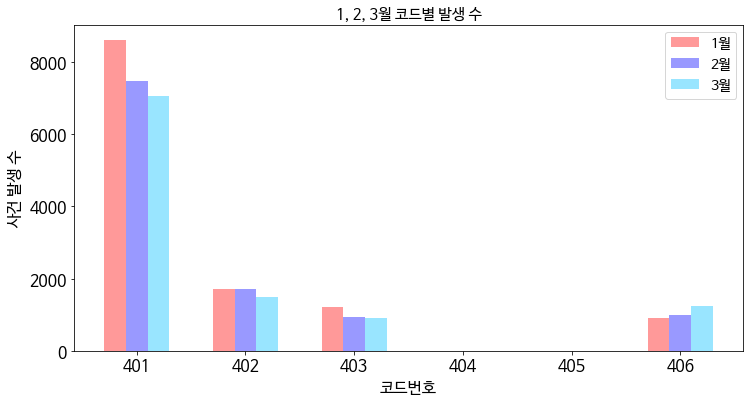

In [29]:
cd_df1 = pd.DataFrame({'1월':[8595,1702,1203,1,2,906],
                         '2월':[7474,1699,924,0,0,991],
                         '3월':[7051,1481,898,0,1,1251]})
cd_df1.index = ['401','402','403','404','405','406']
cd_df1

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.2
index = np.arange(6)

# 각 연도별로 3개의 bar를 표현
b1 = plt.bar(index, cd_df1['1월'], bar_width, alpha=0.4, color='red', label='1월')
b2 = plt.bar(index + bar_width, cd_df1['2월'], bar_width, alpha=0.4, color='b', label='2월')
b3 = plt.bar(index + 2 * bar_width, cd_df1['3월'], bar_width, alpha=0.4, color='deepskyblue', label='3월')

# x축 위치 가운데로 조정하고, x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 6 + bar_width, 1),cd_df1.index,fontsize = 16)
plt.yticks(fontsize=16)

# x축, y축 label명, 범례
plt.title('1, 2, 3월 코드별 발생 수',fontsize = 15)
plt.xlabel('코드번호', size = 16)
plt.ylabel('사건 발생 수', size = 16)
plt.legend(fontsize = 14)
plt.show()


####4,5,6월 

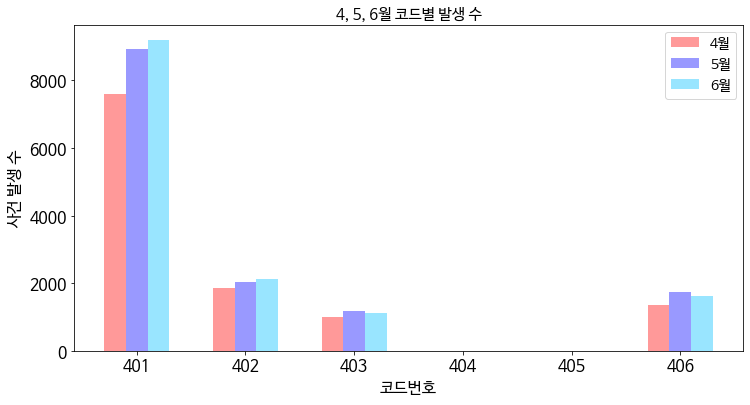

In [30]:
cd_df1 = pd.DataFrame({'4월':[7608,1846,1011,0,0,1349],
                         '5월':[8943,2032,1173,1,3,1727],
                         '6월':[9191,2134,1128,1,1,1611]})
cd_df1.index = ['401','402','403','404','405','406']
cd_df1

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.2
index = np.arange(6)

# 각 연도별로 3개의 bar를 표현
b1 = plt.bar(index, cd_df1['4월'], bar_width, alpha=0.4, color='red', label='4월')
b2 = plt.bar(index + bar_width, cd_df1['5월'], bar_width, alpha=0.4, color='b', label='5월')
b3 = plt.bar(index + 2 * bar_width, cd_df1['6월'], bar_width, alpha=0.4, color='deepskyblue', label='6월')

# x축 위치 가운데로 조정하고, x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 6 + bar_width, 1),cd_df1.index,fontsize = 16)
plt.yticks(fontsize=16)

# x축, y축 label명, 범례
plt.title('4, 5, 6월 코드별 발생 수',fontsize = 15)
plt.xlabel('코드번호', size = 16)
plt.ylabel('사건 발생 수', size = 16)
plt.legend(fontsize = 14)
plt.show()

####7,8,9월 

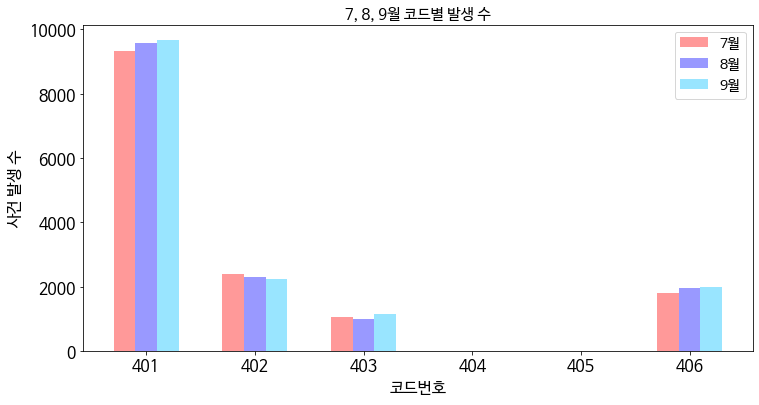

In [31]:
cd_df1 = pd.DataFrame({'7월':[9328,2403,1050,2,2,1810],
                         '8월':[9571,2303,990,1,2,1941],
                         '9월':[9665,2222,1132,0,0,1976]})
cd_df1.index = ['401','402','403','404','405','406']
cd_df1

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.2
index = np.arange(6)

# 각 연도별로 3개의 bar를 표현
b1 = plt.bar(index, cd_df1['7월'], bar_width, alpha=0.4, color='red', label='7월')
b2 = plt.bar(index + bar_width, cd_df1['8월'], bar_width, alpha=0.4, color='b', label='8월')
b3 = plt.bar(index + 2 * bar_width, cd_df1['9월'], bar_width, alpha=0.4, color='deepskyblue', label='9월')

# x축 위치 가운데로 조정하고, x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 6 + bar_width, 1),cd_df1.index,fontsize = 16)
plt.yticks(fontsize=16)

# x축, y축 label명, 범례
plt.title('7, 8, 9월 코드별 발생 수',fontsize = 15)
plt.xlabel('코드번호', size = 16)
plt.ylabel('사건 발생 수', size = 16)
plt.legend(fontsize = 14)
plt.show()

####10,11,12월 

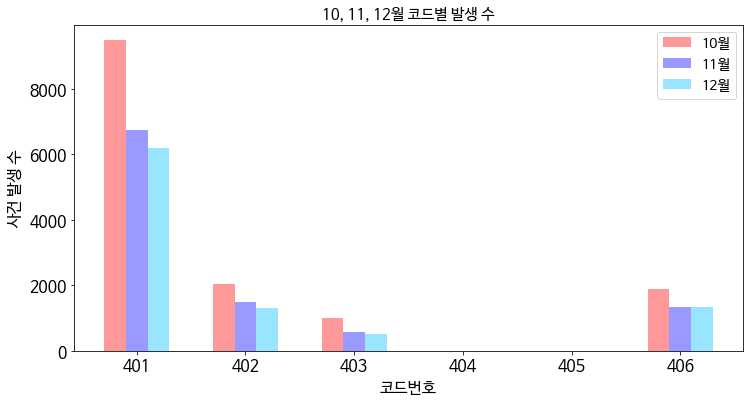

In [32]:
cd_df1 = pd.DataFrame({'10월':[9490,2047,992,0,2,1892],
                        '11월':[6743,1490,587,1,3,1345],
                       '12월':[6207,1294,516,0,1,1325]})
cd_df1.index = ['401','402','403','404','405','406']
cd_df1

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.2
index = np.arange(6)

# 각 연도별로 2개의 bar를 표현
b1 = plt.bar(index, cd_df1['10월'], bar_width, alpha=0.4, color='red', label='10월')
b2 = plt.bar(index + bar_width, cd_df1['11월'], bar_width, alpha=0.4, color='b', label='11월')
b3 = plt.bar(index + 2 * bar_width, cd_df1['12월'], bar_width, alpha=0.4, color='deepskyblue', label='12월')

# x축 위치 가운데로 조정하고, x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 6 + bar_width, 1),cd_df1.index,fontsize = 16)
plt.yticks(fontsize=16)

# x축, y축 label명, 범례
plt.title('10, 11, 12월 코드별 발생 수',fontsize = 15)
plt.xlabel('코드번호', size = 16)
plt.ylabel('사건 발생 수', size = 16)
plt.legend(fontsize = 14)
plt.show()

### 월별 코드 발생 수 그래프

#### 401번 

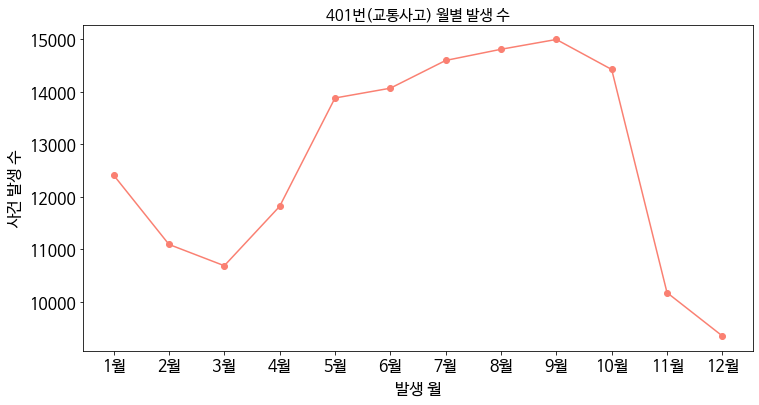

In [33]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values_1 = [8595, 7474, 7051, 7608, 8943, 7608, 9328, 9571, 9665, 9490, 6743,6207]

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('401번(교통사고) 월별 발생 수',fontsize = 15)
plt.xlabel('발생 월', size = 16)
plt.ylabel('사건 발생 수', size = 16)
plt.show()

#### 402번

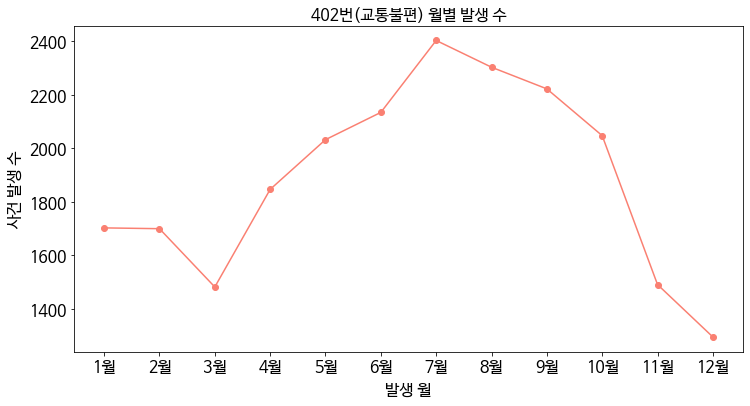

In [34]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [1702, 1699, 1481, 1846, 2032, 2134, 2403, 2303, 2222, 2047, 1490,1294]

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('402번(교통불편) 월별 발생 수',fontsize = 16)
plt.xlabel('발생 월', size = 16)
plt.ylabel('사건 발생 수', size = 16)
plt.show()

####403번 

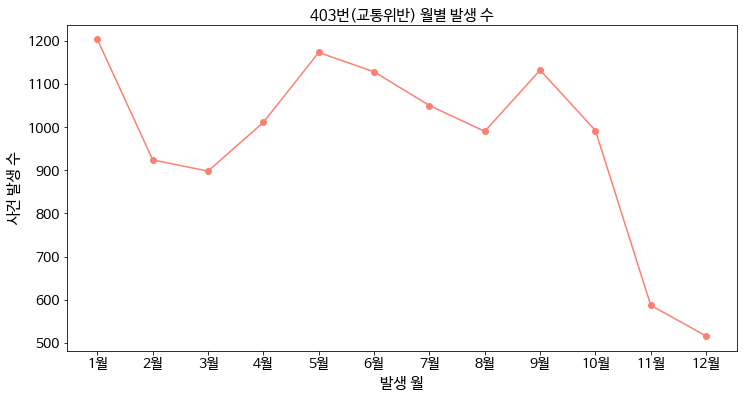

In [35]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [1203, 924, 898, 1011, 1173, 1128, 1050, 990, 1132, 992, 587,516]

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('403번(교통위반) 월별 발생 수',fontsize = 15)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 발생 수', size = 15)
plt.show()

####404번

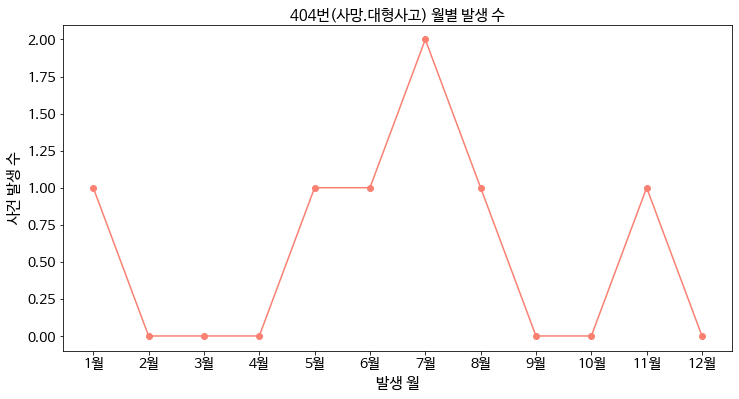

In [36]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [1, 0, 0, 0, 1, 1,2,1,0,0,1,0 ]

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('404번(사망.대형사고) 월별 발생 수',fontsize = 15)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 발생 수', size = 15)
plt.show()

####405번

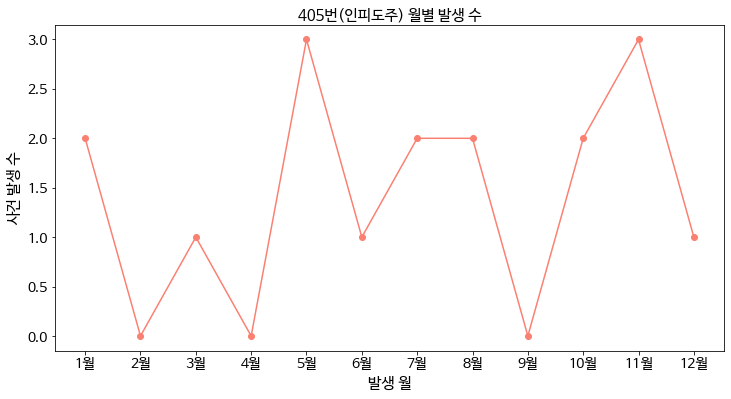

In [37]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [2, 0, 1, 0, 3, 1, 2, 2, 0, 2, 3,1]

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('405번(인피도주) 월별 발생 수',fontsize = 15)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 발생 수', size = 15)
plt.show()

####406번

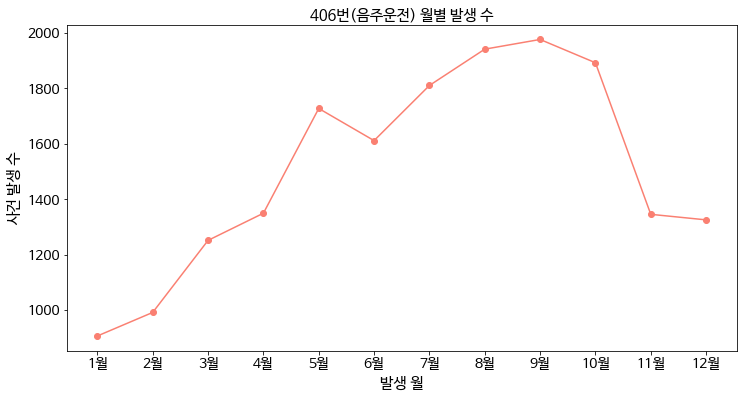

In [38]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [906, 991, 1251, 1349, 1727, 1611, 1810, 1941, 1976, 1892, 1345,1325]

fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('406번(음주운전) 월별 발생 수',fontsize = 15)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 발생 수', size = 15)
plt.show()

### 가장 데이터량이 유사한 3가지 코드(402,403,406) 비교 그래프

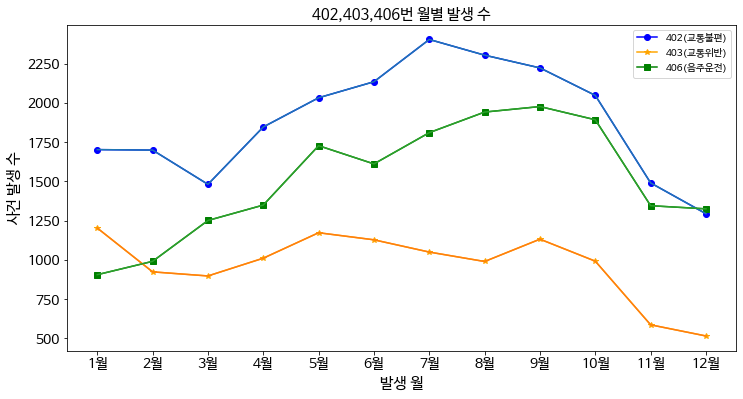

In [39]:
x_values = ['1월', '2월', '3월', '4월', '5월','6월','7월','8월','9월','10월','11월','12월']
y_values_1 = [1702, 1699, 1481, 1846, 2032, 2134, 2403, 2303, 2222, 2047, 1490,1294]  #402
y_values_2 = [1203, 924, 898, 1011, 1173, 1128, 1050, 990, 1132, 992, 587,516]  #403
y_values_3 = [906, 991, 1251, 1349, 1727, 1611, 1810, 1941, 1976, 1892, 1345,1325]  #406

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(x_values, y_values_1,marker='o',color = 'blue')
plt.plot(x_values, y_values_2,marker='*', color = 'orange')
plt.plot(x_values, y_values_3,marker='s',color = 'green')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('402,403,406번 월별 발생 수',fontsize = 15)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 발생 수', size = 15)

plt.plot(x_values, y_values_1)
plt.plot(x_values, y_values_2)
plt.plot(x_values, y_values_3)

plt.legend(['402(교통불편)', '403(교통위반)','406(음주운전)'])
plt.show()

#KP2020.csv 분석

##Data Load, Data Cleaning

In [40]:
df = pd.read_csv('/content/drive/MyDrive/KP2020.csv',encoding = 'cp949',low_memory = False)
df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [41]:
ns_df= df[(df['EVT_CL_CD'] > 400) & (df['EVT_CL_CD'] < 500)]
ns_df.to_csv('KP2020교통사고데이터.csv',index = False)  #추출된 데이터를 따로 저장
ns_df = pd.read_csv('KP2020교통사고데이터.csv', low_memory = False)

ns_df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
1,대전청,20/12/01 03:24:26.000000000,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
2,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
3,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
4,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN
...,...,...,...,...,...,...,...,...,...,...
9338,충남청,20/12/31 00:16:14.000000000,19,10,406,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 690-8,126.298968,36.747649,Y
9339,대전청,20/12/31 01:08:43.000000000,13,10,401,1.0,대전광역시 중구 대흥동(행정:대흥동),127.428343,36.324386,NaN
9340,충남청,20/12/31 00:26:16.000000000,19,10,406,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 690-8,126.298968,36.747649,Y
9341,대전청,20/12/31 01:17:01.000000000,13,10,401,1.0,대전광역시 서구 도마동(행정:도마2동) 549-1,127.369099,36.312971,NaN


In [42]:
ns_df[ns_df['RECV_CPLT_DM'].str.extract(r'20/12/(.*)')[0].notnull()]  #전부 2020년 12월 데이터인지 파악 
len(ns_df)  #9343일시 전부 2020년 12월 데이터 

9343

##코드별 개수 파악 

In [43]:
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(ns_df.loc[ns_df['EVT_CL_CD'] == i]))

코드 401번의 개수: 6207
코드 402번의 개수: 1294
코드 403번의 개수: 516
코드 404번의 개수: 0
코드 405번의 개수: 1
코드 406번의 개수: 1325


##데이터 시각화

### 코드 분류를 위하여 데이터 가공

In [44]:
#우선 RECV_CPLT_DT열을 모두 일만 남기고 없애기
day_df = ns_df.loc[:,'RECV_CPLT_DM':'EVT_CL_CD']

day_df.replace({'(.*)/01(.*)':r'1일','(.*)/02(.*)': r'2일','(.*)/03(.*)': r'3일','(.*)/04(.*)': r'4일','(.*)/05(.*)': r'5일',
               '(.*)/06(.*)': r'6일','(.*)/07(.*)': r'7일','(.*)/08(.*)': r'8일','(.*)/09(.*)': r'9일','(.*)/10(.*)': r'10일',
               '(.*)/11(.*)': r'11일','(.*)/12 (.*)': r'12일','(.*)/13(.*)': r'13일','(.*)/14(.*)': r'14일','(.*)/15(.*)': r'15일',
               '(.*)/16(.*)': r'16일','(.*)/17(.*)': r'17일','(.*)/18(.*)': r'18일','(.*)/19(.*)': r'19일','(.*)/20(.*)': r'20일',
               '(.*)/21(.*)': r'21일','(.*)/22(.*)': r'22일','(.*)/23(.*)': r'23일','(.*)/24(.*)': r'24일','(.*)/25(.*)': r'25일',
               '(.*)/26(.*)': r'26일','(.*)/27(.*)': r'27일','(.*)/28(.*)': r'28일','(.*)/29(.*)': r'29일','(.*)/30(.*)': r'30일',
               '(.*)/31(.*)': r'31일'}, regex=True, inplace = True)
               
day_df

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
0,1일,19,10,401
1,1일,13,10,406
2,1일,19,10,402
3,1일,13,10,401
4,1일,13,10,401
...,...,...,...,...
9338,31일,19,10,406
9339,31일,13,10,401
9340,31일,19,10,406
9341,31일,13,10,401


###코드별 개수 시각화

In [45]:
#plt.bar(ns_df['EVT_CL_CD'])
for i in range(401,407):
  print("코드 %d번의 개수:"%i,len(day_df.loc[day_df['EVT_CL_CD'] == i]))

코드 401번의 개수: 6207
코드 402번의 개수: 1294
코드 403번의 개수: 516
코드 404번의 개수: 0
코드 405번의 개수: 1
코드 406번의 개수: 1325


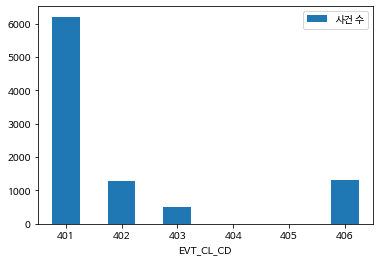

In [46]:
code_df = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                        '사건 수':[6207,1294,516,0,1,1325],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
'''코드 401의 빈도가 매우 높기 때문에, 404와 같이 빈도가 낮은 코드는 육안으로 파악할 수 없다.'''
#데이터 시각화
code_df.plot.bar(x='EVT_CL_CD', y='사건 수', rot=0)

### 어떤 날짜에 가장 사건이 많았는지 나타내는 그래프

####날짜별로 분류한 dataframe 만들기

In [47]:
unique_days = day_df['RECV_CPLT_DM'].unique()
df_list = []
for RECV_CPLT_DM in unique_days:
    df_list.append(day_df[day_df['RECV_CPLT_DM'] == RECV_CPLT_DM])

df_list

[     RECV_CPLT_DM  NPA_CL  EVT_STAT_CD  EVT_CL_CD
 0              1일      19           10        401
 1              1일      13           10        406
 2              1일      19           10        402
 3              1일      13           10        401
 4              1일      13           10        401
 ...           ...     ...          ...        ...
 1008           1일      19           10        401
 1021           1일      19           10        406
 1024           1일      19           10        406
 1025           1일      31           10        406
 1026           1일      19           10        401
 
 [325 rows x 4 columns],      RECV_CPLT_DM  NPA_CL  EVT_STAT_CD  EVT_CL_CD
 316            4일      13           10        406
 317            4일      19           10        401
 321            4일      19           10        406
 324            4일      31           10        401
 325            4일      13           10        401
 ...           ...     ...          ...        ...
 1795

In [48]:
for i in range(1,32):
  print("%d일의 사건 수:"%i,len(day_df.loc[day_df['RECV_CPLT_DM'] == '%d일'%i]))

1일의 사건 수: 325
2일의 사건 수: 346
3일의 사건 수: 337
4일의 사건 수: 383
5일의 사건 수: 341
6일의 사건 수: 289
7일의 사건 수: 355
8일의 사건 수: 317
9일의 사건 수: 288
10일의 사건 수: 317
11일의 사건 수: 326
12일의 사건 수: 317
13일의 사건 수: 219
14일의 사건 수: 259
15일의 사건 수: 314
16일의 사건 수: 257
17일의 사건 수: 286
18일의 사건 수: 370
19일의 사건 수: 271
20일의 사건 수: 209
21일의 사건 수: 319
22일의 사건 수: 261
23일의 사건 수: 325
24일의 사건 수: 350
25일의 사건 수: 246
26일의 사건 수: 254
27일의 사건 수: 196
28일의 사건 수: 272
29일의 사건 수: 265
30일의 사건 수: 262
31일의 사건 수: 467


#### 데이터 시각화 

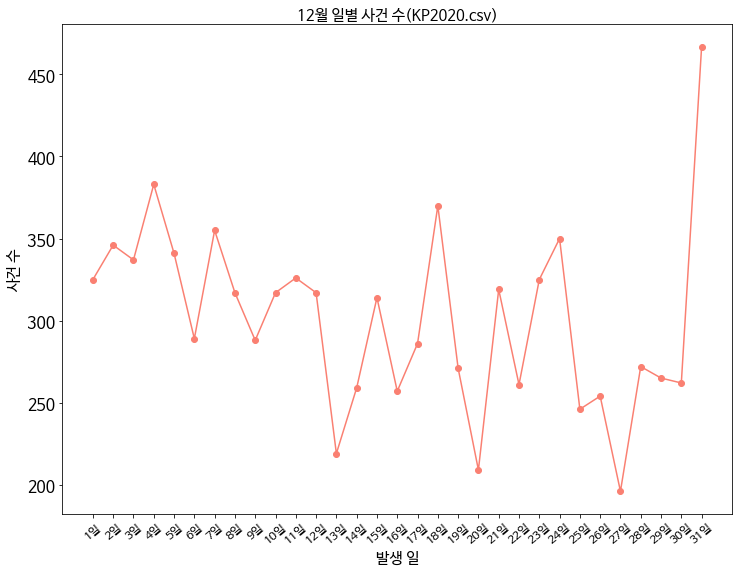

In [49]:
'''
date_df = pd.DataFrame({'날짜':['1일','2일','3일','4일','5일',
                              '6일','7일','8일','9일','10일',
                              '11일','12일','13일','14일','15일',
                              '16일','17일','18일','19일','20일',
                              '21일','22일','23일','24일','25일',
                              '26일','27일','28일','29일','30일',
                              '31일'],
                        '사건 수':[325,346,337,383,341,
                                289,355,317,288,317,
                                326,317,219,259,314,
                                257,286,370,271,209,
                                319,261,325,350,246,
                                254,196,272,265,262,
                                467]})
                                '''
                                
x_values = ['1일','2일','3일','4일','5일',
             '6일','7일','8일','9일','10일',
              '11일','12일','13일','14일','15일',
              '16일','17일','18일','19일','20일',
              '21일','22일','23일','24일','25일',
              '26일','27일','28일','29일','30일',
              '31일']

y_values = [325,346,337,383,341,
              289,355,317,288,317,
              326,317,219,259,314,
              257,286,370,271,209,
              319,261,325,350,246,
              254,196,272,265,262,
              467]

fig, ax = plt.subplots(figsize=(12,9))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)

plt.title('12월 일별 사건 수(KP2020.csv)',fontsize = 15)
plt.xlabel('발생 일', size = 15)
plt.ylabel('사건 수', size = 15)
plt.xticks(rotation=40)

plt.show()

#KP2021.csv 분석

##Data Load, Data Cleaning

In [50]:
df = pd.read_csv('/content/drive/MyDrive/KP2021.csv',encoding = 'cp949',low_memory = False)
df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [51]:
ns_df= df[(df['EVT_CL_CD'] > 400) & (df['EVT_CL_CD'] < 500)]
ns_df.to_csv('KP2021교통사고데이터.csv',index = False)  #추출된 데이터를 따로 저장
ns_df = pd.read_csv('KP2021교통사고데이터.csv', low_memory = False)

day_df = ns_df.loc[:,'RECV_DEPT_NM':'EVT_CL_CD']  #교통사고에 해당하는 사건과 관할청/ 발생시각/ 진행 상태/ 사건 코드만 추출 
#day_df

In [52]:
#시간 제거 
day_df['RECV_CPLT_DM'] = day_df['RECV_CPLT_DM'].str.extract(r'(\d{2}/\d{2}/\d{2})').astype(str)
day_df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
0,충남청,21/03/07,19,10,406
1,충남청,21/03/07,19,10,402
2,대전청,21/03/07,13,10,401
3,대전청,21/03/07,13,10,401
4,충남청,21/03/07,19,10,403
...,...,...,...,...,...
278321,대전청,23/01/15,13,10,401
278322,충남청,23/01/16,19,10,401
278323,충남청,23/01/14,19,10,403
278324,대전청,23/01/14,13,10,401


### 데이터 연도별로 분류 

df_2021: 2021년/ df_2022: 2022년/ df_2023: 2023년 


In [53]:
df_2021 = day_df[day_df['RECV_CPLT_DM'].str.extract(r'21/(.*)')[0].notnull()]

df_2021

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
0,충남청,21/03/07,19,10,406
1,충남청,21/03/07,19,10,402
2,대전청,21/03/07,13,10,401
3,대전청,21/03/07,13,10,401
4,충남청,21/03/07,19,10,403
...,...,...,...,...,...
132100,충남청,21/12/29,19,10,401
132103,대전청,21/12/29,13,10,401
132109,충남청,21/12/29,19,10,402
132110,대전청,21/12/29,13,10,401


In [54]:
df_2022 = day_df[day_df['RECV_CPLT_DM'].str.extract(r'22/(.*)')[0].notnull()]

df_2022

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
38391,대전청,22/01/03,19,10,401
38402,충남청,22/01/03,19,10,401
38403,충남청,22/01/06,19,10,406
38404,충남청,22/01/06,19,10,401
38405,충남청,22/01/06,19,10,401
...,...,...,...,...,...
273344,충남청,22/12/29,19,10,406
273504,충남청,22/12/31,19,10,401
273536,충남청,22/12/31,18,10,401
273849,대전청,22/12/31,13,10,401


In [55]:
df_2023 = day_df[day_df['RECV_CPLT_DM'].str.extract(r'23/(.*)')[0].notnull()]
df_2023

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
269590,충남청,23/01/06,19,10,401
269598,대전청,23/01/06,13,10,401
269610,대전청,23/01/06,13,10,402
269619,충남청,23/01/06,19,10,401
269623,대전청,23/01/06,13,10,402
...,...,...,...,...,...
278321,대전청,23/01/15,13,10,401
278322,충남청,23/01/16,19,10,401
278323,충남청,23/01/14,19,10,403
278324,대전청,23/01/14,13,10,401


###2021년 데이터 분석 

In [56]:
#df_2021
for i in range(401,407):
  print("2021년 코드 %d번의 개수:"%i,len(df_2021.loc[df_2021['EVT_CL_CD'] == i]))

2021년 코드 401번의 개수: 77738
2021년 코드 402번의 개수: 17629
2021년 코드 403번의 개수: 11539
2021년 코드 404번의 개수: 6
2021년 코드 405번의 개수: 22
2021년 코드 406번의 개수: 23518


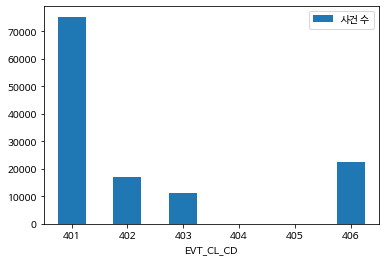

In [57]:
code_df = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                        '사건 수':[75374,17011,11140,4,22,22675],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
'''코드별 발생빈도가 매우 다양하기 때문에, 일반적인 막대그래프로 표현하면 404, 405와 같은 코드는 육안으로 파악할 수 없다.'''
#참고용 일반적 막대그래프
code_df.plot.bar(x='EVT_CL_CD', y='사건 수', rot=0)

In [58]:
'''y축의 값이 밑이 log인 수로 변경'''
fig = px.bar(code_df[['EVT_CL_CD','사건 수']].sort_values('EVT_CL_CD', ascending = False),
             x = 'EVT_CL_CD', y = '사건 수', log_y = True, template = 'ggplot2',height = 500, width = 500)
fig.show()

#### 월별 코드 수 변화량 

In [59]:
#2021년 데이터를 월별로 분류
df_2021.replace({'(.*)/01/(.*)':r'1월','(.*)/02/(.*)': r'2월','(.*)/03/(.*)': r'3월','(.*)/04/(.*)': r'4월','(.*)/05/(.*)': r'5월',
               '(.*)/06/(.*)': r'6월','(.*)/07/(.*)': r'7월','(.*)/08/(.*)': r'8월','(.*)/09/(.*)': r'9월','(.*)/10/(.*)': r'10월',
               '(.*)/11/(.*)': r'11월','(.*)/12/(.*)': r'12월'}, regex=True, inplace = True)
df_2021

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
0,충남청,3월,19,10,406
1,충남청,3월,19,10,402
2,대전청,3월,13,10,401
3,대전청,3월,13,10,401
4,충남청,3월,19,10,403
...,...,...,...,...,...
132100,충남청,12월,19,10,401
132103,대전청,12월,13,10,401
132109,충남청,12월,19,10,402
132110,대전청,12월,13,10,401


In [60]:
for i in range(1,13):
  print("집계된 2021년 %d월의 사건 수:"%i,len(df_2021.loc[df_2021['RECV_CPLT_DM'] == '%d월'%i]))

집계된 2021년 1월의 사건 수: 8074
집계된 2021년 2월의 사건 수: 8429
집계된 2021년 3월의 사건 수: 10116
집계된 2021년 4월의 사건 수: 10083
집계된 2021년 5월의 사건 수: 10956
집계된 2021년 6월의 사건 수: 11200
집계된 2021년 7월의 사건 수: 11867
집계된 2021년 8월의 사건 수: 11266
집계된 2021년 9월의 사건 수: 12625
집계된 2021년 10월의 사건 수: 12601
집계된 2021년 11월의 사건 수: 12218
집계된 2021년 12월의 사건 수: 11017


#### 전체 사건 수 변화량 그래프 

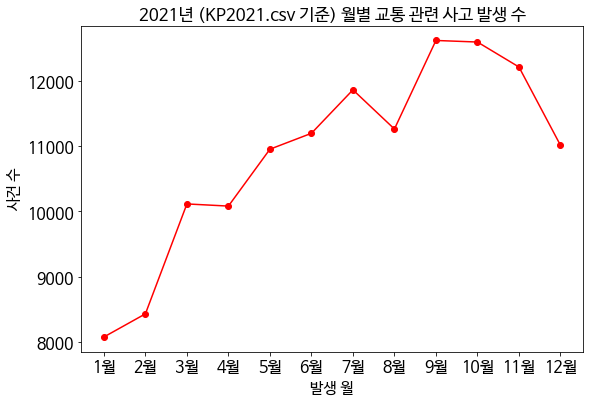

In [61]:
x_values = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [8074,8429,10116,10083,10956,11200,11867,11266,12625,12601,12218,11017]

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(x_values, y_values, color = 'red',marker='o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('2021년 (KP2021.csv 기준) 월별 교통 관련 사고 발생 수',fontsize = 17)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 수', size = 15)
#plt.xticks(rotation=40)

plt.show()

###2022년 데이터 분석

#### 월별 코드 수 변화량 

In [62]:
for i in range(401,407):
  print("2022년 코드 %d번의 개수:"%i,len(df_2022.loc[df_2022['EVT_CL_CD'] == i]))

2022년 코드 401번의 개수: 83015
2022년 코드 402번의 개수: 19045
2022년 코드 403번의 개수: 12300
2022년 코드 404번의 개수: 10
2022년 코드 405번의 개수: 13
2022년 코드 406번의 개수: 27270


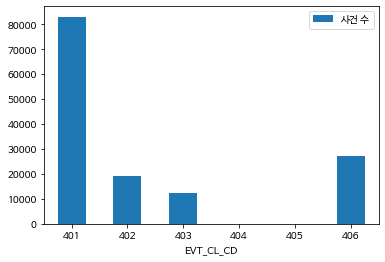

In [63]:
code_df = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                        '사건 수':[83015,19045,12300,10,13,27270],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
'''코드별 발생빈도가 매우 다양하기 때문에, 일반적인 막대그래프로 표현하면 404, 405와 같은 코드는 육안으로 파악할 수 없다.'''
#참고용 일반적 막대그래프
code_df.plot.bar(x='EVT_CL_CD', y='사건 수', rot=0)

In [64]:
'''y축의 값이 밑이 log인 수로 변경'''
fig = px.bar(code_df[['EVT_CL_CD','사건 수']].sort_values('EVT_CL_CD', ascending = False),
             x = 'EVT_CL_CD', y = '사건 수', log_y = True, template = 'ggplot2',height = 500, width = 500)
fig.show()

#### 전체 사건 수 변화량 그래프 

In [65]:
#2021년 데이터를 월별로 분류
df_2022.replace({'(.*)/01/(.*)':r'1월','(.*)/02/(.*)': r'2월','(.*)/03/(.*)': r'3월','(.*)/04/(.*)': r'4월','(.*)/05/(.*)': r'5월',
               '(.*)/06/(.*)': r'6월','(.*)/07/(.*)': r'7월','(.*)/08/(.*)': r'8월','(.*)/09/(.*)': r'9월','(.*)/10/(.*)': r'10월',
               '(.*)/11/(.*)': r'11월','(.*)/12/(.*)': r'12월'}, regex=True, inplace = True)
df_2022

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
38391,대전청,1월,19,10,401
38402,충남청,1월,19,10,401
38403,충남청,1월,19,10,406
38404,충남청,1월,19,10,401
38405,충남청,1월,19,10,401
...,...,...,...,...,...
273344,충남청,12월,19,10,406
273504,충남청,12월,19,10,401
273536,충남청,12월,18,10,401
273849,대전청,12월,13,10,401


In [72]:
for i in range(1,13):
  print("집계된 2022년 %d월의 사건 수:"%i,len(df_2022.loc[df_2022['RECV_CPLT_DM'] == '%d월'%i]))

집계된 2022년 1월의 사건 수: 9574
집계된 2022년 2월의 사건 수: 7998
집계된 2022년 3월의 사건 수: 9763
집계된 2022년 4월의 사건 수: 11285
집계된 2022년 5월의 사건 수: 12983
집계된 2022년 6월의 사건 수: 12192
집계된 2022년 7월의 사건 수: 12549
집계된 2022년 8월의 사건 수: 12622
집계된 2022년 9월의 사건 수: 13834
집계된 2022년 10월의 사건 수: 13770
집계된 2022년 11월의 사건 수: 12933
집계된 2022년 12월의 사건 수: 12150


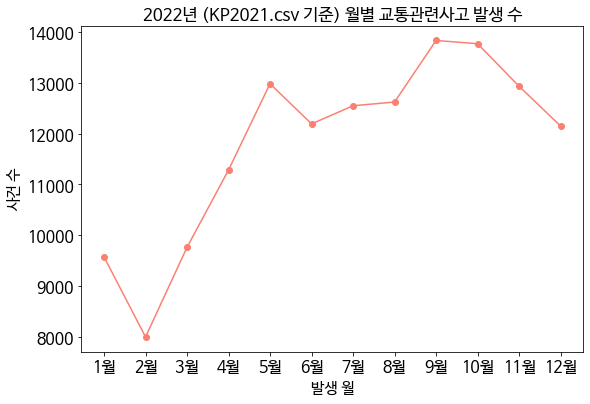

In [67]:
x_values = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
y_values = [9574,7998,9763,11285,12983,12192,12549,12622,13834,13770,12933,12150]

fig, ax = plt.subplots(figsize=(9,6))

plt.plot(x_values, y_values, color = 'salmon',marker='o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('2022년 (KP2021.csv 기준) 월별 교통관련사고 발생 수',fontsize = 17)
plt.xlabel('발생 월', size = 15)
plt.ylabel('사건 수', size = 15)
#plt.xticks(rotation=40)

plt.show()

###2023년 데이터 분석

####코드별 분석 


In [68]:
for i in range(401,407):
  print("2023년 코드 %d번의 개수:"%i,len(df_2023.loc[df_2023['EVT_CL_CD'] == i]))

2023년 코드 401번의 개수: 3829
2023년 코드 402번의 개수: 769
2023년 코드 403번의 개수: 456
2023년 코드 404번의 개수: 0
2023년 코드 405번의 개수: 0
2023년 코드 406번의 개수: 1167


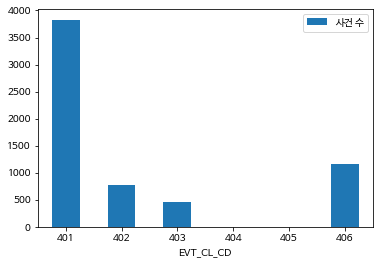

In [69]:
code_df = pd.DataFrame({'EVT_CL_CD':[401,402,403,404,405,406],
                        '사건 수':[3829,769,456,0,0,1167],}) #코드와 코드의 발생빈도에 대한 DataFrame 생성
'''코드별 발생빈도가 매우 다양하기 때문에, 일반적인 막대그래프로 표현하면 404, 405와 같은 코드는 육안으로 파악할 수 없다.'''
#참고용 일반적 막대그래프
code_df.plot.bar(x='EVT_CL_CD', y='사건 수', rot=0)

In [70]:
'''y축의 값이 밑이 log인 수로 변경'''
fig = px.bar(code_df[['EVT_CL_CD','사건 수']].sort_values('EVT_CL_CD', ascending = False),
             x = 'EVT_CL_CD', y = '사건 수', log_y = True, template = 'ggplot2',height = 500, width = 500)
fig.show()

####월별 분석

In [71]:
#2021년 데이터를 월별로 분류
df_2023.replace({'(.*)/01/(.*)':r'1월','(.*)/02/(.*)': r'2월','(.*)/03/(.*)': r'3월','(.*)/04/(.*)': r'4월','(.*)/05/(.*)': r'5월',
               '(.*)/06/(.*)': r'6월','(.*)/07/(.*)': r'7월','(.*)/08/(.*)': r'8월','(.*)/09/(.*)': r'9월','(.*)/10/(.*)': r'10월',
               '(.*)/11/(.*)': r'11월','(.*)/12/(.*)': r'12월'}, regex=True, inplace = True)
print(len(df_2023))
df_2023

6221


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD
269590,충남청,1월,19,10,401
269598,대전청,1월,13,10,401
269610,대전청,1월,13,10,402
269619,충남청,1월,19,10,401
269623,대전청,1월,13,10,402
...,...,...,...,...,...
278321,대전청,1월,13,10,401
278322,충남청,1월,19,10,401
278323,충남청,1월,19,10,403
278324,대전청,1월,13,10,401


모두 2023년 1월 자료이므로, 월별 코드 비교는 불가능하다. 